### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from mrmr import mrmr_regression
from math import sqrt
import joblib
import time



### Data Analysis and Features selection

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

In [3]:
#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

In [18]:
features=['x2', 'x6', 'x5']

X=Train[features]
y=Train['BIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [5]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

### Model Building for KNN

In [20]:
knn=KNeighborsRegressor(n_neighbors=10, p=2, weights='distance')
knn.fit(X_train, y_train)
train_score=knn.score (X_train, y_train)

filename = 'knn model.sav'
joblib.dump(knn, filename)

y_pred = knn.predict(X_test)

test_score=knn.score(X_test, y_test)
print('Train score:', train_score, 'Test score:', test_score)

Train score: 1.0 Test score: 0.87507304859896


1.0 0.7186885371542406
Normalized New Index:
[23.4065682  15.00218395 25.44397374 22.17145501 22.03518963]


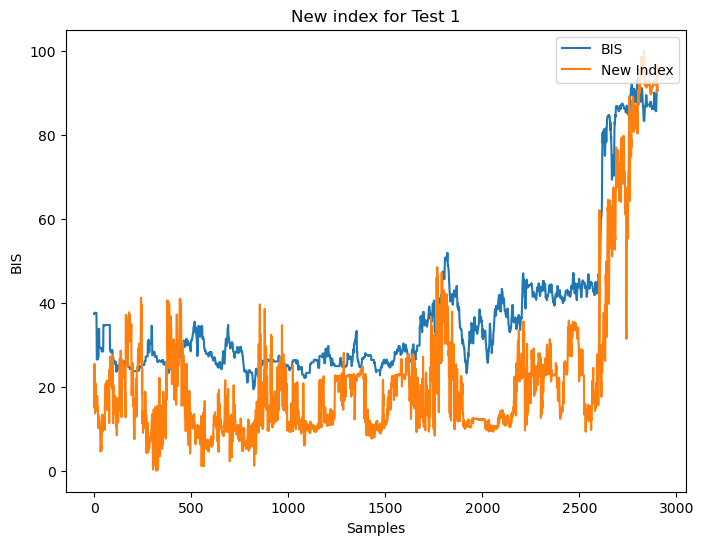

In [21]:
#Test on new data

features=['x2', 'x6', 'x5']

Xx=Test_1[features]
yy=Test_1['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

figure = plt.figure(figsize=(8, 6))
plt.plot(yy, label="BIS")
plt.plot(new_index_normalized, label="New Index")
plt.xlabel('Samples')
plt.ylabel('BIS')
plt.legend(loc='upper right')
plt.title("New index for Test 1")
plt.show()



0.9092954375913014 0.5646707527987757
Normalized New Index:
[97.36724009 95.25804039 93.52281227 93.32834705 93.23859387]


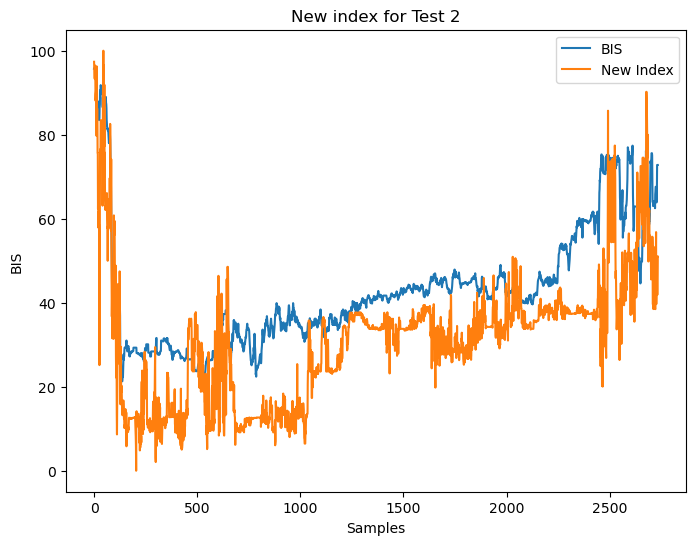

In [33]:
#Test on new data

features=['x2', 'x6', 'x5', 'x8']

Xx=Test_2[features]
yy=Test_2['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

figure = plt.figure(figsize=(8, 6))
plt.plot(yy, label="BIS")
plt.plot(new_index_normalized, label="New Index")
plt.xlabel('Samples')
plt.ylabel('BIS')
plt.legend(loc='upper right')
plt.title("New index for Test 2")
plt.show()



0.9092954375913014 0.6785482304392542
Normalized New Index:
[89.46284266 89.46284266 90.22341943 87.27618444 87.41879258]


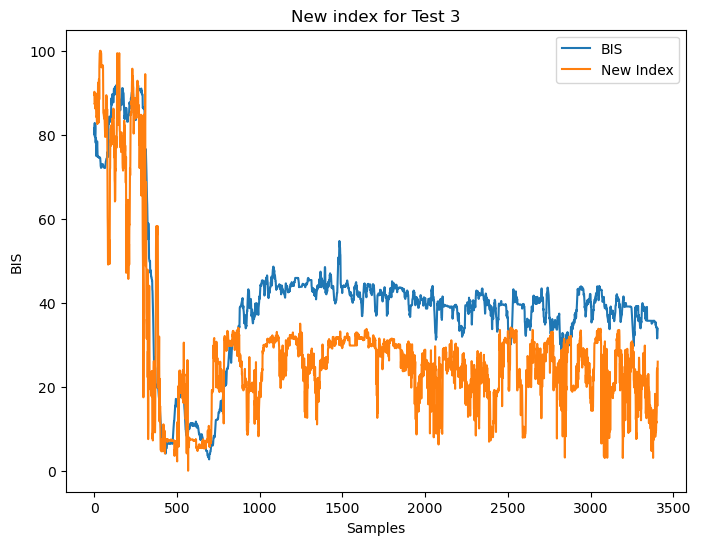

In [34]:
#Test on new data

features=['x2', 'x6', 'x5', 'x8']

Xx=Test_3[features]
yy=Test_3['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

figure = plt.figure(figsize=(8, 6))
plt.plot(yy, label="BIS")
plt.plot(new_index_normalized, label="New Index")
plt.xlabel('Samples')
plt.ylabel('BIS')
plt.legend(loc='upper right')
plt.title("New index for Test 3")
plt.show()



0.9092954375913014 0.3560007838202649
Normalized New Index:
[86.56976744 86.22093023 86.72965116 86.77325581 85.68313953]


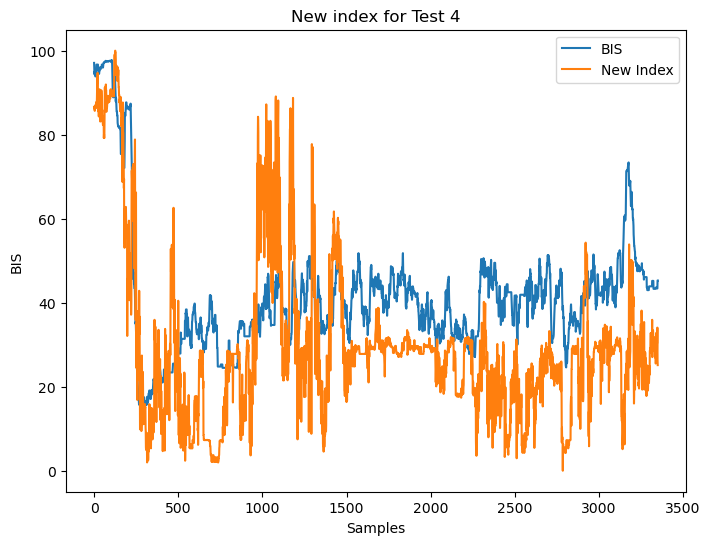

In [35]:
#Test on new data

features=['x2', 'x6', 'x5', 'x8']

Xx=Test_4[features]
yy=Test_4['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

figure = plt.figure(figsize=(8, 6))
plt.plot(yy, label="BIS")
plt.plot(new_index_normalized, label="New Index")
plt.xlabel('Samples')
plt.ylabel('BIS')
plt.legend(loc='upper right')
plt.title("New index for Test 4")
plt.show()



0.9092954375913014 0.7163893158839179
Normalized New Index:
[89.06743185 89.68436155 89.06743185 89.06743185 89.64131994]


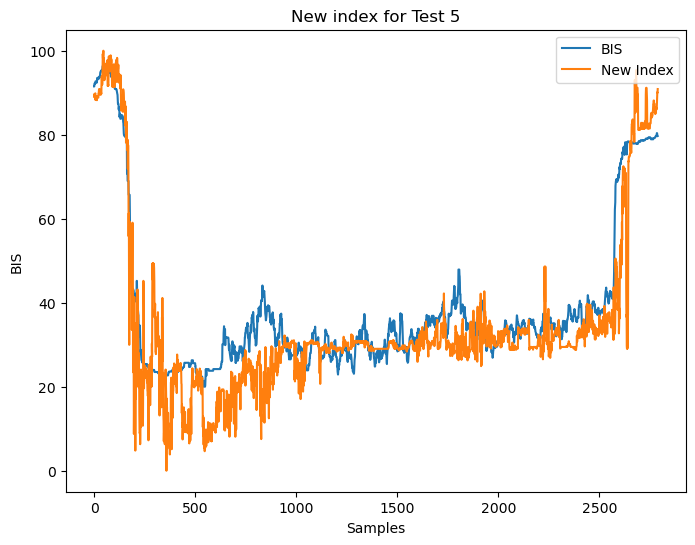

In [36]:
#Test on new data

features=['x2', 'x6', 'x5', 'x8']

Xx=Test_5[features]
yy=Test_5['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

figure = plt.figure(figsize=(8, 6))
plt.plot(yy, label="BIS")
plt.plot(new_index_normalized, label="New Index")
plt.xlabel('Samples')
plt.ylabel('BIS')
plt.legend(loc='upper right')
plt.title("New index for Test 5")
plt.show()



0.9092954375913014 0.6238524966423427
Normalized New Index:
[23.71290545 14.25810904 24.36162871 20.59351277 22.37405107]


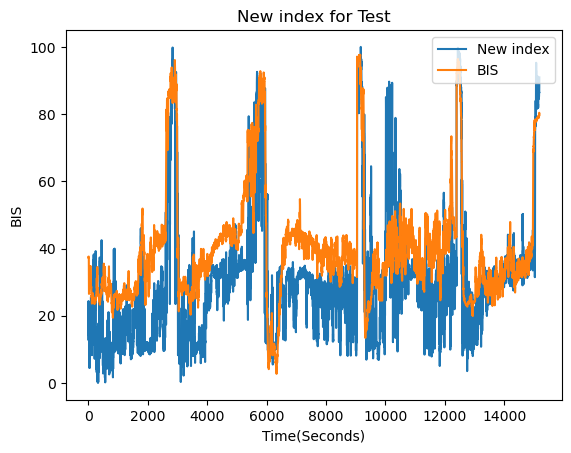

In [37]:
#Test on new data

features=['x2', 'x6', 'x5', 'x8']

Xx=Test[features]
yy=Test['BIS']

train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

plt.plot(new_index_normalized, label='New index')
plt.plot(yy,label ="BIS")
plt.title("New index for Test")
plt.ylabel('BIS')
plt.xlabel('Time(Seconds)')
plt.legend(loc="upper right")
plt.show()

In [15]:
# Create a KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use for prediction,
    'algorithm':['auto', 'ball_tree', 'kd_tree','brute'],
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for the Minkowski distance (1 for Manhattan distance, 2 for Euclidean distance)
    
}

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_regressor, param_grid, cv=10, scoring='r2')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

model_score=grid_search.score(X_train, y_train)

filename = 'KNN.sav'
joblib.dump(grid_search, filename)

# Get the best model with the best hyperparameters
best_knn_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_knn_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best KNeighbors Regressor Model:", best_knn_model)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print('The model score:', model_score)

Best KNeighbors Regressor Model: KNeighborsRegressor(p=1, weights='distance')
Mean Squared Error (MSE): 27.151702785632793
R-squared (R2): 0.9063535923089524
The model score: 1.0


In [12]:

features=['x2', 'x6', 'x5', 'x8']

Xx=Test_1[features]
yy=Test_1['BIS']

grid_search.score(Xx, yy)

0.7182549146140276

Normalized New Index:
[26.33780676 12.75338956 24.31436581 22.15103054 20.55989841]


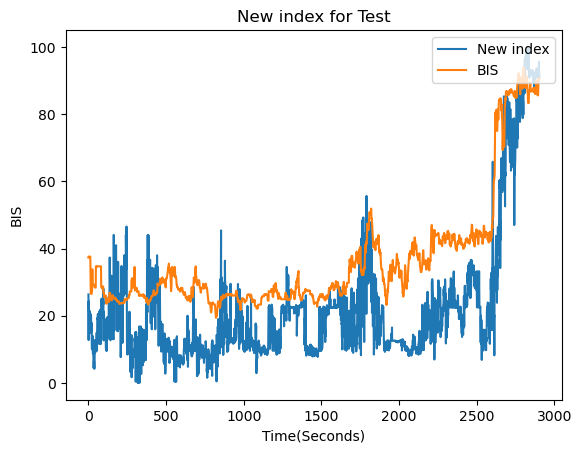

In [13]:
new_in = grid_search.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

plt.plot(new_index_normalized, label='New index')
plt.plot(yy,label ="BIS")
plt.title("New index for Test")
plt.ylabel('BIS')
plt.xlabel('Time(Seconds)')
plt.legend(loc="upper right")
plt.show()

In [ ]:
train_score=knn.score (X_train, y_train)

y_pred = knn.predict(Xx)

test_score=knn.score(Xx, yy)
print(train_score, test_score)

# To create a new index
new_in = knn.predict(Xx)

# Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
new_index_normalized = scaler.fit_transform(new_in.reshape(-1, 1)).flatten()

# Display the normalized new index for the first few data points
print("Normalized New Index:")
print(new_index_normalized[:5])

plt.plot(new_index_normalized, label='New index')
plt.plot(yy,label ="BIS")
plt.title("New index for Test")
plt.ylabel('BIS')
plt.xlabel('Time(Seconds)')
plt.legend(loc="upper right")
plt.show()